In [1]:
%pylab inline
from classy import *

Populating the interactive namespace from numpy and matplotlib
Version:  0.0.25


## Iris

In [2]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.2)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [3.75866667 1.19866667 5.84333333 3.054     ]
Median:  [4.35 1.3  5.8  3.  ]
Stddev:  [1.75852918 0.76061262 0.82530129 0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


In [3]:
len(data.targets),len(data_train.targets),len(data_test.targets),

(150, 120, 30)

In [4]:
C=Perceptron()

In [5]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.004801034927368164 seconds ')


In [6]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 77.5)
('On Test Set:', 63.33333333333333)


In [8]:
C.weights  # these are the weights

array([[ -5.2,  -2.9,   1.5,   4. ],
       [ 11.8, -23. ,  12.6, -33.6],
       [ 50.5,  50.3, -40.2, -34.5]])

In [9]:
C=BackProp(hidden_layer_sizes = [4],max_iter=10000,tol=1e-4)

In [10]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '1.5985338687896729 seconds ')


In [11]:
data_train.vectors.shape,data_train.targets.shape

((120, 4), (120,))

In [12]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 95.0)
('On Test Set:', 96.66666666666667)


In [13]:
C.weights

[array([[-1.08065252e+00,  9.52796556e-02, -1.58943896e+00,
         -8.28935340e-42],
        [-4.57125312e-01, -2.54793675e-01, -1.60848695e+00,
         -3.13230127e-39],
        [ 5.66766252e-01,  2.44509077e-01,  8.67926146e-01,
          6.19659439e-81],
        [ 6.80331304e-01, -8.86891613e-01,  9.75248954e-01,
         -2.37650832e-07]]),
 array([[ 3.08547893e-01,  1.18527489e+00, -1.96163945e+00],
        [ 2.35980725e-01, -9.17589102e-02, -3.58105409e-01],
        [ 1.01267589e+00, -1.88427180e+00, -9.25026076e-01],
        [-4.11257778e-15, -3.25712393e-60, -6.54717443e-07]])]

In [14]:
W_inp_hid,W_hid_out=C.weights
print(W_inp_hid)
print("==")
print(W_hid_out)

[[-1.08065252e+00  9.52796556e-02 -1.58943896e+00 -8.28935340e-42]
 [-4.57125312e-01 -2.54793675e-01 -1.60848695e+00 -3.13230127e-39]
 [ 5.66766252e-01  2.44509077e-01  8.67926146e-01  6.19659439e-81]
 [ 6.80331304e-01 -8.86891613e-01  9.75248954e-01 -2.37650832e-07]]
==
[[ 3.08547893e-01  1.18527489e+00 -1.96163945e+00]
 [ 2.35980725e-01 -9.17589102e-02 -3.58105409e-01]
 [ 1.01267589e+00 -1.88427180e+00 -9.25026076e-01]
 [-4.11257778e-15 -3.25712393e-60 -6.54717443e-07]]


## XOR Problem - Perceptron

In [19]:
data=make_dataset(bob=[[0,0],[1,1]],sally=[[0,1],[1,0]])

In [22]:
data

{'vectors': array([[0, 0],
        [1, 1],
        [0, 1],
        [1, 0]]),
 'targets': array([0, 0, 1, 1]),
 'target_names': ['bob', 'sally'],
 'feature_names': ['0', '1']}

In [23]:
C=Perceptron()

In [24]:
C.fit(data.vectors,data.targets)

In [25]:
print((C.predict(data.vectors)))
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))

[0 1 1 0]
('On Training Set:', 50.0)


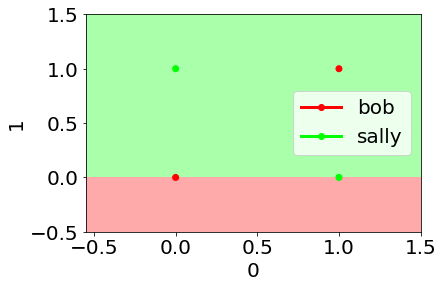

In [26]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

## XOR Problem - Backprop

In [27]:
data.vectors

array([[0, 0],
       [1, 1],
       [0, 1],
       [1, 0]])

In [28]:
data.targets

array([0, 0, 1, 1])

In [33]:
C=BackProp(hidden_layer_sizes = [5],max_iter=10000,tol=1e-4)

In [34]:
C.fit(data.vectors,data.targets)

In [35]:
print((C.predict(data.vectors)))
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))


[0 0 1 1]
('On Training Set:', 100.0)


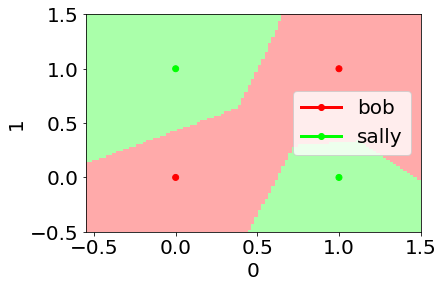

In [36]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

In [37]:
print((data.vectors))
print()
print((data.targets))

[[0 0]
 [1 1]
 [0 1]
 [1 0]]

[0 0 1 1]


In [38]:
C.output(data.vectors)

[array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.85984975e+00],
        [1.13796092e-04, 0.00000000e+00, 1.44284088e+00, 0.00000000e+00,
         6.48986179e-01],
        [2.17329471e+00, 0.00000000e+00, 5.17550258e-04, 0.00000000e+00,
         2.50853927e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.96657294e-04]]), array([[0.10065648],
        [0.05054005],
        [0.94917726],
        [0.79612643]])]

In [39]:
h,y=C.output(data.vectors)
print(h)
print() 
print((np.round(h)))
print()
print(y)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.85984975e+00]
 [1.13796092e-04 0.00000000e+00 1.44284088e+00 0.00000000e+00
  6.48986179e-01]
 [2.17329471e+00 0.00000000e+00 5.17550258e-04 0.00000000e+00
  2.50853927e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.96657294e-04]]

[[0. 0. 0. 0. 2.]
 [0. 0. 1. 0. 1.]
 [2. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0.]]

[[0.10065648]
 [0.05054005]
 [0.94917726]
 [0.79612643]]


In [46]:
print(around(C.weights[0],2))
around(C.weights[1],2)

[[-2.17 -0.    1.44 -0.   -1.86]
 [ 2.17 -0.    1.44  0.57  0.65]]


array([[ 2.93],
       [ 0.  ],
       [-2.12],
       [-0.51],
       [-1.91]])

In [47]:
data.vectors.shape

(4, 2)

## Curvy data

(-1.3228757541475575,
 1.4473758611880614,
 -1.2228389237388826,
 1.2245566761542976)

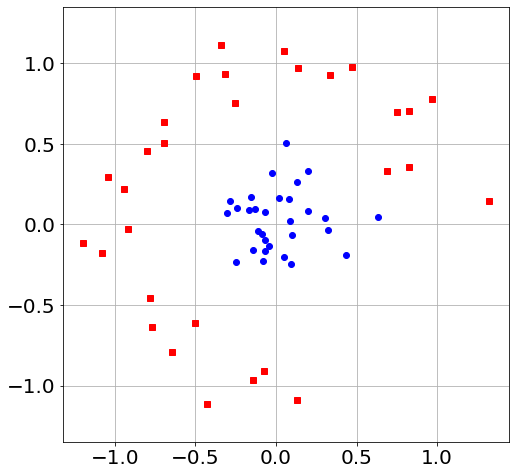

In [50]:
figure(figsize=(8,8))
N=30
x1=randn(N)*.2
y1=randn(N)*.2

plot(x1,y1,'bo')

a=linspace(0,3*pi/2,N)
x2=cos(a)+randn(N)*.2
y2=sin(a)+randn(N)*.2

plot(x2,y2,'rs')

axis('equal')

In [51]:
vectors=vstack([hstack([atleast_2d(x1).T,atleast_2d(y1).T]),
        hstack([atleast_2d(x2).T,atleast_2d(y2).T]),
        ])
targets=concatenate([zeros(N),ones(N)])
target_names=['center','around']
feature_names=['x','y']

In [52]:
data=Struct(vectors=vectors,targets=targets,
                target_names=target_names,feature_names=feature_names)

('On Training Set:', 50.0)


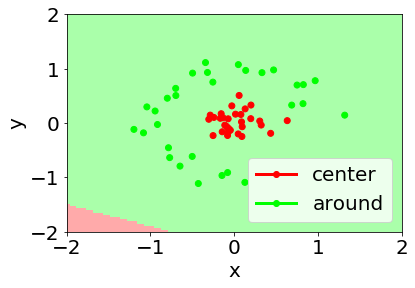

In [55]:
C=Perceptron()
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])

('On Training Set:', 100.0)


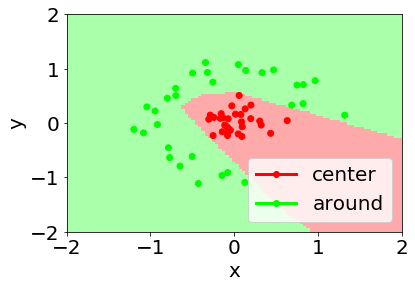

In [56]:
C=BackProp(hidden_layer_sizes = [6],max_iter=10000,tol=1e-4)
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])

('On Training Set:', 96.66666666666667)


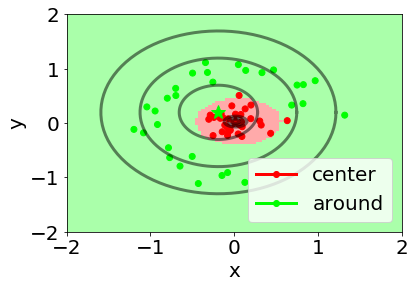

In [59]:
C=NaiveBayes()
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
C.plot_centers()
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])


('On Training Set:', 100.0)


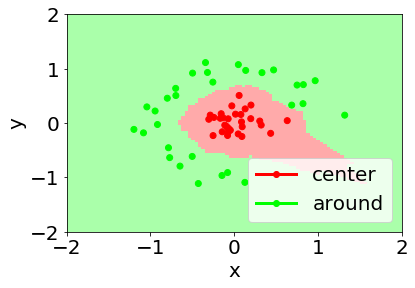

In [57]:
C=kNearestNeighbor()
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])

('On Training Set:', 100.0)


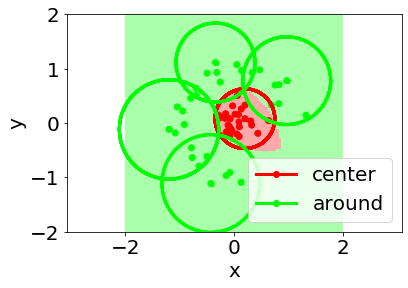

In [58]:
C=CSC()
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
C.plot_centers()
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])


## 8x8 - Autoencoder

In [60]:
vectors=eye(8)
targets=arange(1,9)
print((vectors,targets))

(array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]]), array([1, 2, 3, 4, 5, 6, 7, 8]))


In [61]:
C=BackProp(activation='logistic',hidden_layer_sizes = [3],max_iter=10000,tol=1e-4)
C.fit(vectors,targets)
print((C.predict(vectors)))

[1 2 3 4 5 6 7 8]


In [62]:
h,y=C.output(vectors)

In [64]:
around(h,2)

array([[0.03, 0.01, 0.92],
       [0.95, 0.91, 0.04],
       [0.91, 0.02, 0.04],
       [0.05, 0.95, 0.04],
       [0.04, 0.91, 0.96],
       [0.96, 0.01, 0.97],
       [0.96, 0.94, 0.95],
       [0.04, 0.23, 0.03]])

In [65]:
h.round()

array([[0., 0., 1.],
       [1., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [0., 0., 0.]])

In [66]:
y.round()

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [67]:
C.predict(vectors)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [68]:
y.shape

(8, 8)

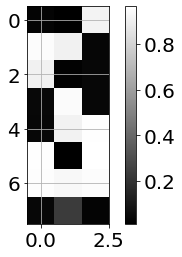

In [69]:
imshow(h,interpolation='nearest',cmap=cm.gray)
colorbar()

In [70]:
weights_xh,weights_hy=C.weights

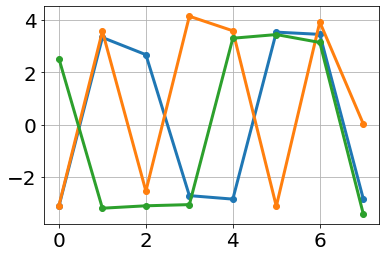

In [71]:
plot(weights_xh,'-o')

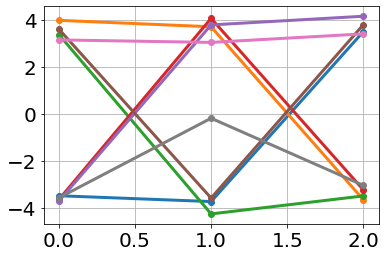

In [72]:
plot(weights_hy,'-o')

## Tuning the number of hidden units

In [73]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.75)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [3.75866667 1.19866667 5.84333333 3.054     ]
Median:  [4.35 1.3  5.8  3.  ]
Stddev:  [1.75852918 0.76061262 0.82530129 0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (37, 4)
Test vector shape:  (113, 4)


select which number of hidden units to use

Text(0, 0.5, 'Percent Correct on Test Data')

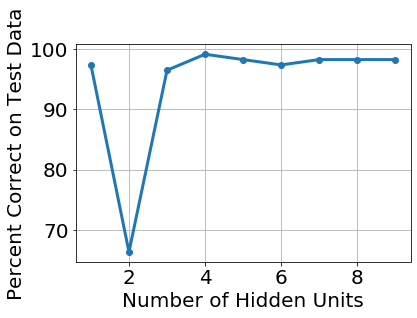

In [75]:
hidden=list(range(1,10))
percent_correct=[]
for n in hidden:
    C=BackProp(hidden_layer_sizes = [n],tol=1e-4,max_iter=10000)
    C.fit(data_train.vectors,data_train.targets)
    percent_correct.append(C.percent_correct(data_test.vectors,data_test.targets))
    
plot(hidden,percent_correct,'-o')
xlabel('Number of Hidden Units')
ylabel('Percent Correct on Test Data')